# Importing necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.4)

# Data Exploration and Visualization

In [3]:
insurance = pd.read_csv("./data/insurance.csv")

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


how many regions are there

In [5]:
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot: xlabel='region', ylabel='count'>

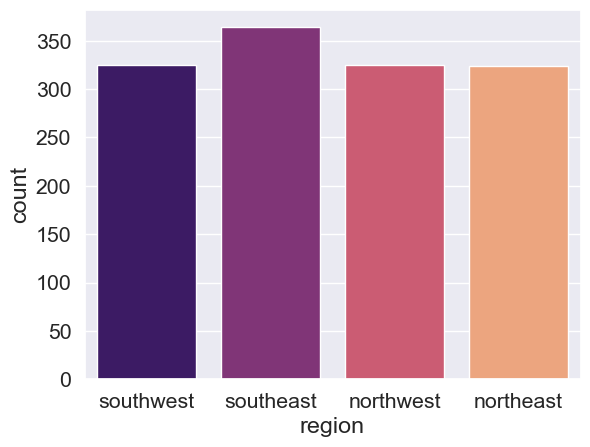

In [6]:
sns.countplot(x="region", data=insurance, palette="magma")

#### checking the balance of the data wrt sex

<AxesSubplot: xlabel='sex', ylabel='count'>

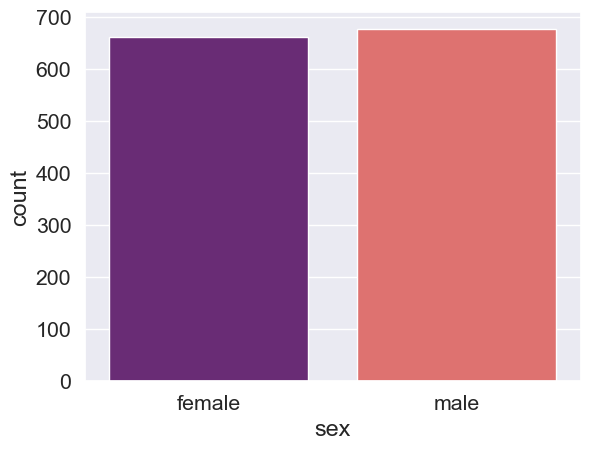

In [7]:
sns.countplot(x="sex", data=insurance, palette="magma")

almost the same number of males and females in the dataset. No bias there.

#### checking the balance of the data wrt smoker

<AxesSubplot: xlabel='smoker', ylabel='count'>

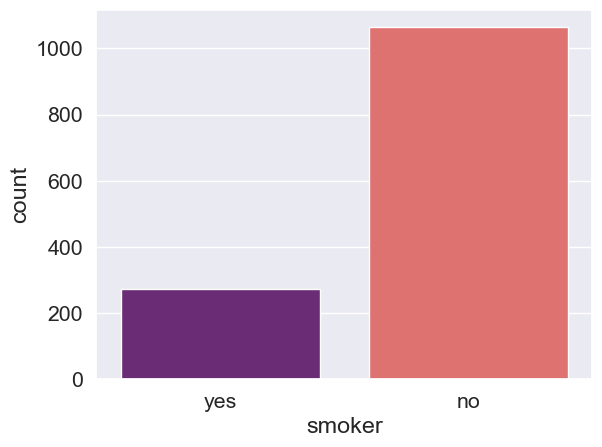

In [8]:
sns.countplot(x="smoker", data=insurance, palette="magma")

most of the people in the dataset are non-smokers. I should use a stratified splitting method to split the data into train and test sets.

In [9]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


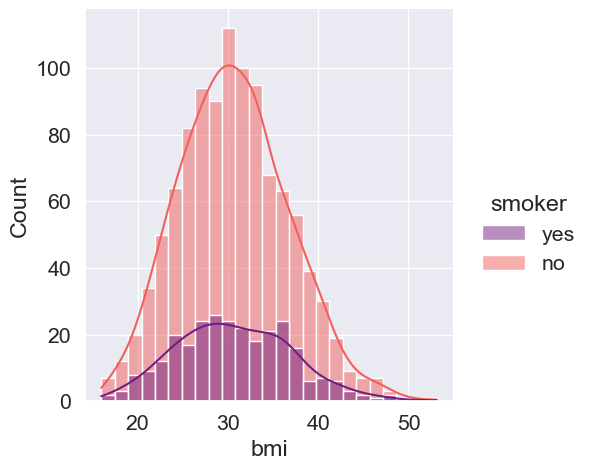

In [10]:
sns.displot(x="bmi", kde=True, data=insurance, palette="magma", hue="smoker")

The dataset is quite evenly distributed wrt to the smokers' bmi and non-smokers' bmi.

#### age distribution of the dataset

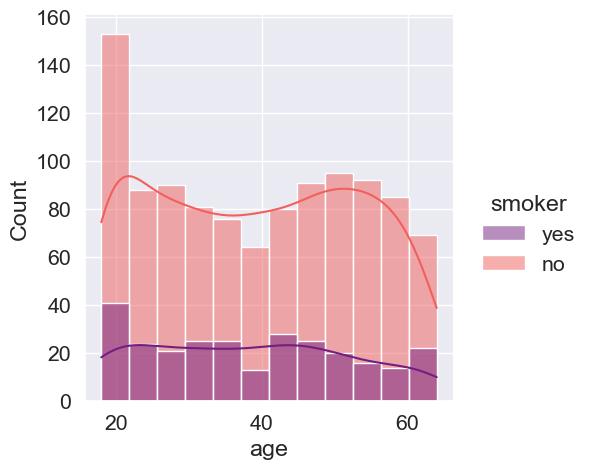

In [11]:
sns.displot(x="age", kde=True, data=insurance, palette="magma", hue="smoker")

<AxesSubplot: >

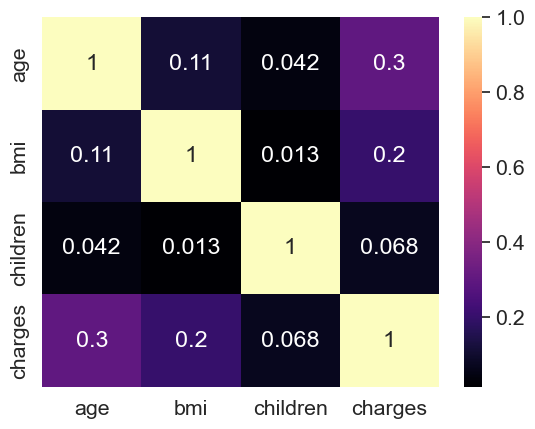

In [12]:
correlation_matrix = insurance.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="magma")

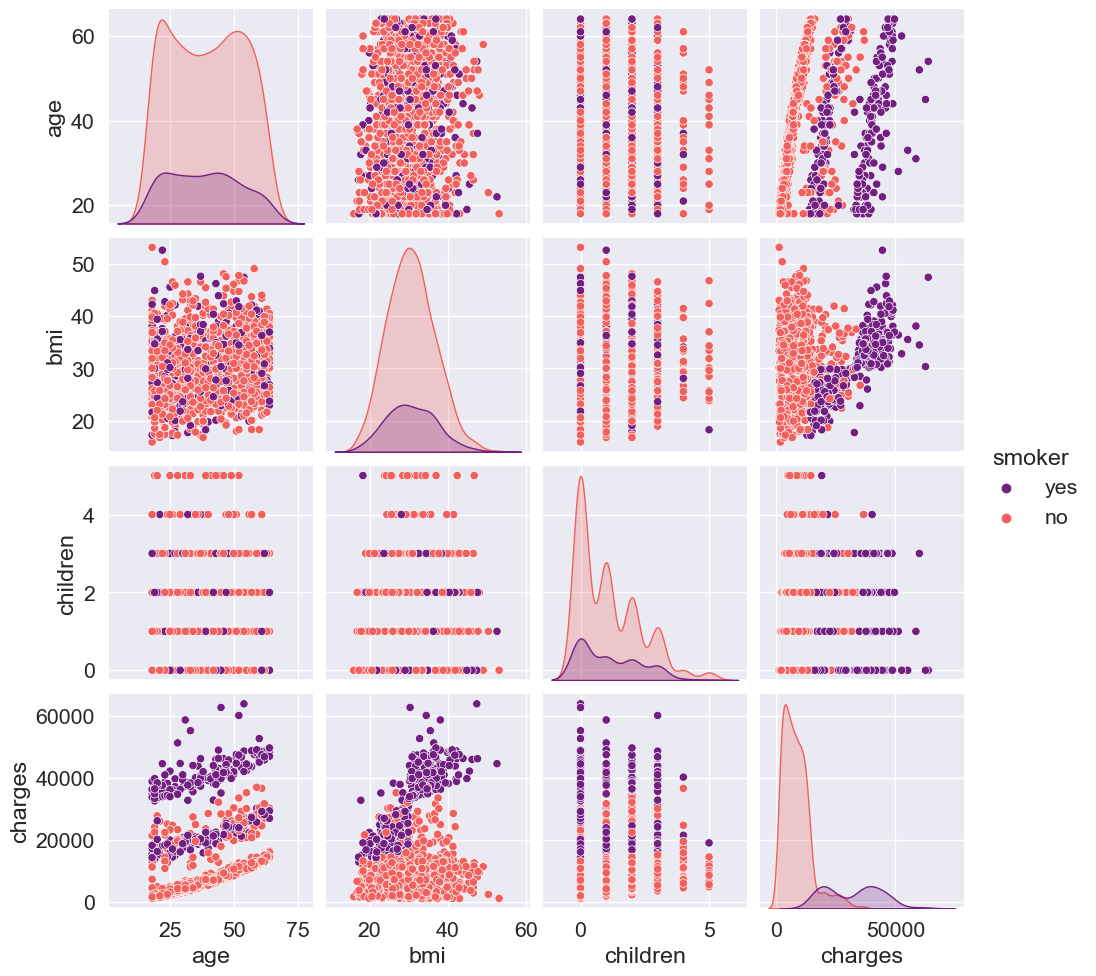

In [13]:
sns.pairplot(insurance, hue="smoker", palette="magma")

generally, smokers have higher charges than non-smokers.

# Preprocessing and Feature Engineering Pipelines

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
# conerting the insurance charges to int
insurance["charges"] = insurance["charges"].apply(int)

# categorizing the bmi into 3 categories: underweight, normal, overweight
# insurance["bmi"] = pd.cut(insurance["bmi"], bins=[0, 18.5, 25, 100], labels=["underweight", "normal", "overweight"])

initially tried to categorise the bmi but that gave a worse result than the continuous bmi. So, I decided to keep the bmi as it is.

In [16]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884
1,18,male,33.770,1,no,southeast,1725
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3866


# Model Building and Evaluation

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

In [18]:
# using stratified sampling to split the data into train and test based on smoker column
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(insurance, insurance["smoker"]):
    strat_train_set = insurance.loc[train_index]
    strat_test_set = insurance.loc[test_index]

# training data
X_train = strat_train_set.drop("charges", axis=1)
y_train = strat_train_set["charges"].copy().to_numpy().reshape(-1, 1)

# test data
X_test = strat_test_set.drop("charges", axis=1)
y_test = strat_test_set["charges"].copy().to_numpy().reshape(-1, 1)


#### Evaluation Steps

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
def evaluate_model(model, model_name: str):
    # predicting the test data
    y_pred: np.ndarray = model.predict(X_test)

    # printing the model name
    print(f"Model: {model_name}")
    
    # calculating the error metrics
    print("Mean Squared Error: ", f"{mean_squared_error(y_test, y_pred): .4f}")
    print("Mean Absolute Error: ", f"{mean_absolute_error(y_test, y_pred): .4f}")
    print("R2 Score: ", f"{r2_score(y_test, y_pred): .4f}")

    # plotting both the scatter of y_test and the regression line for predicted values
    sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), color="green")
    sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), color="red")
    plt.show()

#### Model Building

Model: LinearRegression
Mean Squared Error:   31129882.9366
Mean Absolute Error:   3875.3769
R2 Score:   0.7890


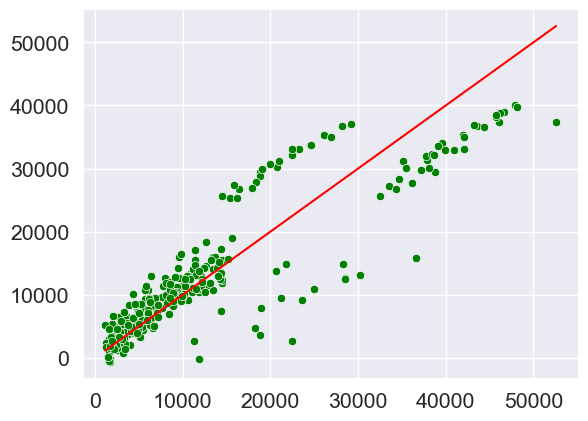



Model: Ridge
Mean Squared Error:   31150479.7014
Mean Absolute Error:   3873.0540
R2 Score:   0.7889


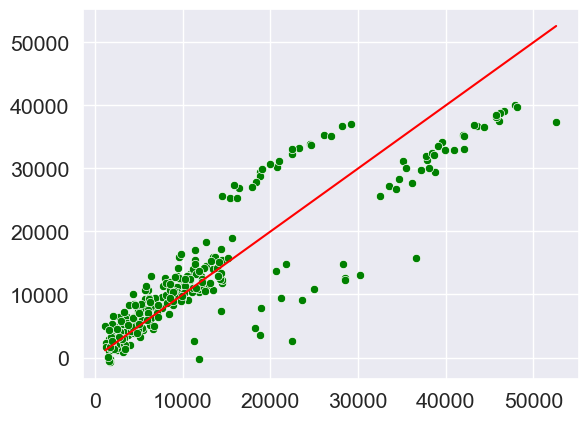



Model: RandomForestRegressor
Mean Squared Error:   22755654.7990
Mean Absolute Error:   2850.0436
R2 Score:   0.8458


/Users/trevenue44/0-Stuff/DevLab/ml102/env/lib/python3.10/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


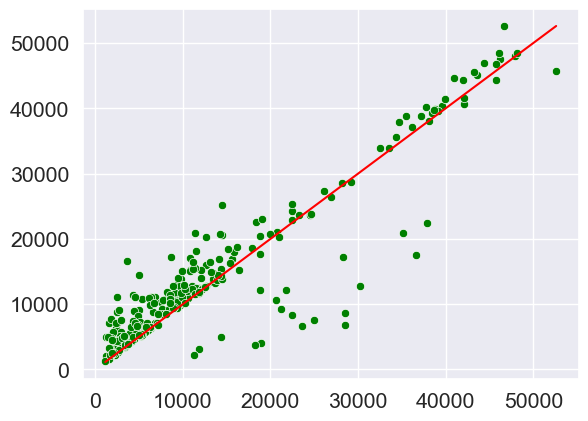

In [21]:
# using column transformer to convert the categorical data to numerical data
column_transformer = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), ["sex", "smoker", "region"]),
        ("scaler", StandardScaler(), ["age", "bmi"])
    ],
    remainder="passthrough"
)

base_models = [
    LinearRegression(), 
    Ridge(alpha=1, solver="cholesky", random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
]

for model in base_models:
    # pipeline for training the model
    model = Pipeline([
        ("column_transformer", column_transformer),
        (str(model).split("(")[0], model)
    ])
    # training the model
    model.fit(X_train, y_train)

    # evaluating the model
    evaluate_model(model, model_name=model.steps[-1][0])

    print("\n")